<a href="https://colab.research.google.com/github/rewaaalaa7/Diabetes-Classification-with-RandomForestClassification/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('/content/diabetes.csv')
df.head() # reading the dataset and get the first 5 records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.shape # get to know how many rows and cols we got

(768, 9)

In [47]:
df.info # get more info about the dataset

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [48]:
df.describe().T # transpose index and columns

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [49]:
df.isnull().sum # check if we fot any null values

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age 

In [50]:
print(df.groupby('Outcome').size()) # it shows that 500 has no diabetes and 268 got Diabetes

Outcome
0    500
1    268
dtype: int64


In [51]:
diabetes0=df[df['Outcome']==0] # contains only the rows of df where the value of 'Outcome' is 0.
diabetes1=df[df['Outcome']==1] # contains only the rows of df where the value of 'Outcome' is 1.

<Axes: xlabel='Outcome', ylabel='count'>

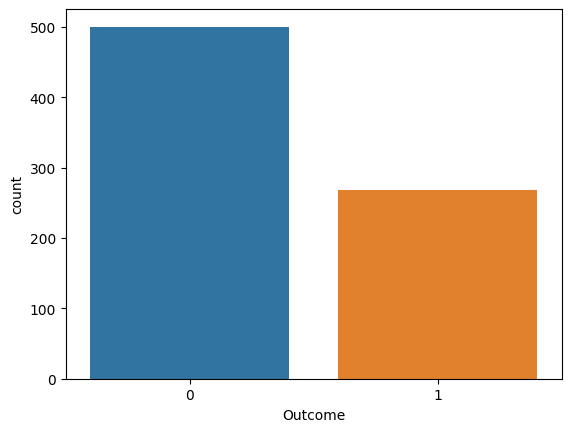

In [52]:
sns.countplot(data = df, x ='Outcome', label = 'Count')

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
x = df.iloc[: , :-1] # contains all the columns of df except the last one
y = df.iloc[: , [-1]] # contains only the last column
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 0) # split the dataset into 20% of the data is used for testing and 80% for training.

In [55]:
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0) #  create instance of the RandomForestClassifier class
classifier.fit(x_train, y_train) # it builds the forest of trees from the training features and labels.

RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [56]:
y_pred = classifier.predict(x_test) # predicts the labels for the test features

In [57]:
cm = confusion_matrix(y_test, y_pred) # computes the confusion matrix between the actual labels and predicted labels
print(cm)

[[94 13]
 [23 24]]


In [58]:
print(classification_report(y_test, y_pred)) # prints the classification report for the actual labels and the predicted labels

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.65      0.51      0.57        47

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154



In [59]:
print(" the accuracy is : ", classifier.score(x_test, y_test) * 100) #prints the accuracy score of the classifier on the test data

 the accuracy is :  76.62337662337663


In [60]:
!pip install scikit-plot

In [61]:
import scikitplot as skplt

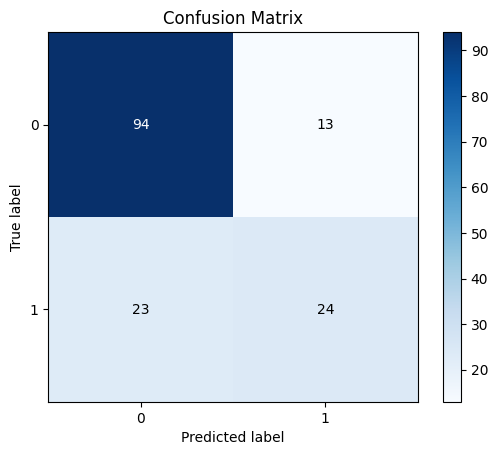

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = False)
plt.show()

In [63]:
# test cases
print("the prediction for this patient is : ", classifier.predict(np.array([[6,148,72,35,	0,33.6,	0.627,50]])))
print("the prediction for this patient is : ", classifier.predict(np.array([[6,142,72,45,0,38.6,0.627,50]])))
print("the prediction for this patient is : ", classifier.predict(np.array([[1,109,30,38,83,53.3,0.195,33]])))

the prediction for this patient is :  [1]
the prediction for this patient is :  [1]
the prediction for this patient is :  [0]
